In [15]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [16]:
application_df = application_df.drop(["EIN"],1)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [17]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [18]:
name = application_df.NAME.value_counts()
name

PARENT BOOSTER USA INC                                           1260
TOPS CLUB INC                                                     765
UNITED STATES BOWLING CONGRESS INC                                700
WASHINGTON STATE UNIVERSITY                                       492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                   408
                                                                 ... 
FORMANDO VIDAS INC                                                  1
GEORGIA PEACHES PUPPY RESCUE                                        1
TONGAN ALLIANCE OF AMERICA                                          1
WORLD WAR II EXPERIENCE A NON PROFIT EDUCATIONAL ORGANIZATION       1
FRIENDS OF THE PARK ABITA SPRINGS LLC                               1
Name: NAME, Length: 19568, dtype: int64

In [19]:
name[name > 5]

PARENT BOOSTER USA INC                                        1260
TOPS CLUB INC                                                  765
UNITED STATES BOWLING CONGRESS INC                             700
WASHINGTON STATE UNIVERSITY                                    492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                408
                                                              ... 
SOCIETY FOR CREATIVE ANACHRONISM                                 6
AMERICAN SOCIETY OF ADDICTION MEDICINE INC                       6
MENNONITE DISASTER SERVICE                                       6
DEPARTMENT OF OREGON LADIES AUXILLARY TO THE VFW OF THE US       6
FAMILY CAREER AND COMMUNITY LEADERS OF AMERICA INC               6
Name: NAME, Length: 354, dtype: int64

In [20]:
name[name < 5]

DEPARTMENT OF OREGON LADIES AUXILIARY TO THE VFW OF THE US       4
EXPERIMENTAL AIRCRAFT ASSOCIATION                                4
BLUE STAR MOTHERS OF AMERICA INC                                 4
WESTERN GOVERNORS UNIVERSITY                                     4
UNITED MINE WORKERS OF AMERICA- INTERNATIONAL                    4
                                                                ..
FORMANDO VIDAS INC                                               1
GEORGIA PEACHES PUPPY RESCUE                                     1
TONGAN ALLIANCE OF AMERICA                                       1
WORLD WAR II EXPERIENCE A NON PROFIT EDUCATIONAL ORGANIZATION    1
FRIENDS OF THE PARK ABITA SPRINGS LLC                            1
Name: NAME, Length: 19166, dtype: int64

In [21]:
name_count = list(name[name <= 5].index)
name_count

['TEAMSTER HORSEMEN MOTORCYCLE ASSOCIATION INC',
 'MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS',
 'COLLEGE AND UNIVERSITY PROFESSIONAL ASSOCIATION FOR HUMAN SERVICES',
 'FEDERATED GARDEN CLUBS OF MISSOURI INC',
 'PENN STATE ALUMNI ASSOCIATION',
 'VETERANS OF FOREIGN WARS OF THE UNITED STATES DEPT OF COLORADO',
 'ROYAL ORDER OF JESTERS',
 'JAMESTOWN SOCIETY',
 'SOLID WASTE ASSOCIATION OF NORTH AMERICA INC',
 'CHILDRENS HEART FOUNDATION',
 'COUNTRY DANCE AND SONG SOCIETY INC',
 'NATIONAL ORGANIZATION FOR WOMEN INC',
 'INTERNATIONL TRANSPLANT NURSES SOCIETY',
 'HIGH TWELVE INTERNATIONAL',
 'WARRIOR BROTHERHOOD OF VETERANS MOTORCYCLE CLUB INC',
 'ACTS MISSIONS',
 'FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC',
 'SOCIETY FOR MANAGEMENT INFORMATION SYSTEMS',
 'CHC COMMUNITY CARE LLC',
 'FAMILY MOTOR COACH ASSOCIATION',
 'FATHER FLANAGANS BOYS HOME',
 'ARROW CHILD AND FAMILY MINISTRIES',
 'NATIONAL ASSOCIATION OF COMPOSERS USA',
 'SOCIETY OF PLASTICS ENGINEERS',
 'SOCI

In [22]:
for name in name_count:
    application_df.NAME = application_df.NAME.replace(name, 'Other')
application_df.NAME.value_counts()

Other                                                         20043
PARENT BOOSTER USA INC                                         1260
TOPS CLUB INC                                                   765
UNITED STATES BOWLING CONGRESS INC                              700
WASHINGTON STATE UNIVERSITY                                     492
                                                              ...  
MENNONITE DISASTER SERVICE                                        6
DEPARTMENT OF OREGON LADIES AUXILLARY TO THE VFW OF THE US        6
GOLD WING ROAD RIDERS ASSOCIATION                                 6
WASHINGTON SOCIETY OF PROFESSIONAL ENGINEERS                      6
CBMC INC                                                          6
Name: NAME, Length: 355, dtype: int64

In [23]:
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C3700        1
C2380        1
C1245        1
C2600        1
C1283        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

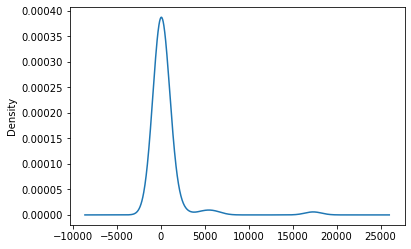

In [24]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [25]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [26]:
categorical = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [27]:
categorical

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [29]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[categorical]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(categorical)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(columns=categorical, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL", axis=1)

In [35]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
X_train_scaled.shape

(25724, 406)

In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

#Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               40700     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 44,691
Trainable params: 44,691
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [43]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch",
    periods=5)


In [44]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5115 - accuracy: 0.7537

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4347 - accuracy: 0.7932

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4216 - accuracy: 0.8012

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4168 - accuracy: 0.7983

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4185 - accuracy: 0.8030

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4216 - accuracy: 0.7970

Epoch 00006: saving model to checkpoints\weights.06.hdf5
Epoch 7/100
804/804 [=========================

804/804 [==============================] - 2s 3ms/step - loss: 0.3995 - accuracy: 0.8091

Epoch 00052: saving model to checkpoints\weights.52.hdf5
Epoch 53/100
804/804 [==============================] - 2s 2ms/step - loss: 0.3989 - accuracy: 0.8122

Epoch 00053: saving model to checkpoints\weights.53.hdf5
Epoch 54/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4018 - accuracy: 0.8081

Epoch 00054: saving model to checkpoints\weights.54.hdf5
Epoch 55/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4027 - accuracy: 0.8059

Epoch 00055: saving model to checkpoints\weights.55.hdf5
Epoch 56/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4026 - accuracy: 0.8090

Epoch 00056: saving model to checkpoints\weights.56.hdf5
Epoch 57/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4048 - accuracy: 0.8065

Epoch 00057: saving model to checkpoints\weights.57.hdf5
Epoch 58/100
804/804 [==============================]

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5028 - accuracy: 0.7831
Loss: 0.502841055393219, Accuracy: 0.783090353012085


In [47]:
nn.save("AlphabetSoupCharity_Optimization.h5")